In [1]:
# basic libraries
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import euler_numerical_diff as eulermod
import traj_utilities as tju
import matplotlib.pyplot as plt
import h5py as h5

In [2]:
model_sod = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=True,visc=0.005, dx=0.001, dt=0.001)
model_sod.load_weights('./sod/sod_1_traj/best_weights/weights')
model_sod_full = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=True,visc=0.005, dx=0.001, dt=0.001)
model_sod_full.load_weights('./sod/sod_4_traj/best_weights/weights')
model_sod_0001 = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=True,visc=0.005, dx=0.0001, dt=0.0001)
model_sod_0001.load_weights('./sod/sod_4_traj_dxt_0001/best_weights/weights')
model_sod_01 = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=True,visc=0.005, dx=0.01, dt=0.01)
model_sod_01.load_weights('./sod/sod_4_traj_dxt_01/best_weights/weights')
model_sod_v0 = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=False,dx=0.001, dt=0.001)
model_sod_v0.load_weights('./sod/sod_4_visc0/best_weights/weights')
model_sod_v05 = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=True,visc=0.05, dx=0.001, dt=0.001)
model_sod_v05.load_weights('./sod/sod_4_visc05/best_weights/weights')
model_sod_v0005 = eulermod.Euler_nd(gamma=5./3.,nh=16, nlayers=4, model_name='dummy',do_visc=True,visc=0.0005, dx=0.001, dt=0.001)
model_sod_v0005.load_weights('./sod/sod_4_visc0005/best_weights/weights')

In [3]:
# read in spacetime data
fname = '../sod_space/SOD_SPACETIME.h5'
space,time,sc_1,sc_2,sc_3,sc_4,st_data,st_input, data_input = tju.load_sp_sod_data(fname)
space_one,time_one,sc_one,st_data_one,st_input_one, data_input_one = tju.load_one_sp_sod_data(fname)

In [4]:
# define grid(s) for reproducing results

# for comparison with full simulation
xx,tt = np.meshgrid(space,time,indexing='ij')
xxtt = np.stack((xx.flatten(), tt.flatten())).T #returns (Np, 2) for input into PINN

#lower res grid
nx_samp = 101
nt_samp = 101
sptim_lin = eulermod.generate_spacetime_coloc_linear([[0.002,0.998]],[0.002,0.248],nx_samp,nt_samp).numpy()

In [5]:
nx = len(space)
nt = len(time)
# generate Predictions
pred_sod_one = model_sod(xxtt)
pred_density_one = pred_sod_one[:,0].numpy().reshape(nx,nt)
pred_v_one = pred_sod_one[:,1].numpy().reshape(nx,nt)
pred_p_one = pred_sod_one[:,2].numpy().reshape(nx,nt)

pred_sod_four = model_sod_full(xxtt)
# %timeit model_sod_full(xxtt) #returns 9.1 seconds on laptop
pred_density_four = pred_sod_four[:,0].numpy().reshape(nx,nt)
pred_v_four = pred_sod_four[:,1].numpy().reshape(nx,nt)
pred_p_four = pred_sod_four[:,2].numpy().reshape(nx,nt)

pred_sod_lin = model_sod_full(sptim_lin)
pred_density_lin = pred_sod_lin[:,0].numpy().reshape(nx_samp,nt_samp)
pred_v_lin = pred_sod_lin[:,1].numpy().reshape(nx_samp,nt_samp)
pred_p_lin = pred_sod_lin[:,2].numpy().reshape(nx_samp,nt_samp)

pred_sod_dx01 = model_sod_01(sptim_lin)

pred_sod_dx0001 = model_sod_0001(sptim_lin)

pred_sod_lin_one = model_sod(sptim_lin)
pred_density_lin_one = pred_sod_lin_one[:,0].numpy().reshape(nx_samp,nt_samp)
pred_v_lin_one = pred_sod_lin_one[:,1].numpy().reshape(nx_samp,nt_samp)
pred_p_lin_one = pred_sod_lin_one[:,2].numpy().reshape(nx_samp,nt_samp)

pred_sod_v0 = model_sod_v0(sptim_lin)
pred_density_v0 = pred_sod_v0[:,0].numpy().reshape(nx_samp,nt_samp)
pred_v_v0 = pred_sod_v0[:,1].numpy().reshape(nx_samp,nt_samp)
pred_p_v0 = pred_sod_v0[:,2].numpy().reshape(nx_samp,nt_samp)

pred_sod_v0_xt = model_sod_v0(xxtt)
pred_density_v0_xt = pred_sod_v0_xt[:,0].numpy().reshape(nx,nt)
pred_v_v0_xt = pred_sod_v0_xt[:,1].numpy().reshape(nx,nt)
pred_p_v0_xt = pred_sod_v0_xt[:,2].numpy().reshape(nx,nt)

pred_sod_v05 = model_sod_v05(sptim_lin)
pred_density_v05 = pred_sod_v05[:,0].numpy().reshape(nx_samp,nt_samp)
pred_v_v05 = pred_sod_v05[:,1].numpy().reshape(nx_samp,nt_samp)
pred_p_v05 = pred_sod_v05[:,2].numpy().reshape(nx_samp,nt_samp)

pred_sod_v05_xt = model_sod_v05(xxtt)
pred_density_v05_xt = pred_sod_v05_xt[:,0].numpy().reshape(nx,nt)
pred_v_v05_xt = pred_sod_v05_xt[:,1].numpy().reshape(nx,nt)
pred_p_v05_xt = pred_sod_v05_xt[:,2].numpy().reshape(nx,nt)

pred_sod_v0005 = model_sod_v0005(sptim_lin)
pred_density_v0005 = pred_sod_v0005[:,0].numpy().reshape(nx_samp,nt_samp)
pred_v_v0005 = pred_sod_v0005[:,1].numpy().reshape(nx_samp,nt_samp)
pred_p_v0005 = pred_sod_v0005[:,2].numpy().reshape(nx_samp,nt_samp)

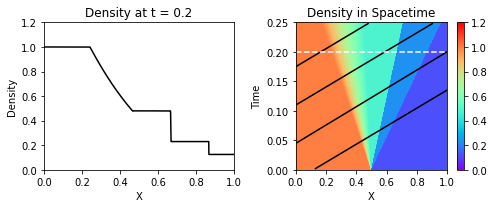

In [6]:
# plots
# first plot is example of base simulation; 1D cut and 2D figure of space-time 
# with trajectories overlaid
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

ax.plot(space,st_data[0,:,200],color='k') # 200 is t = 0.2
ax.set_xlim(0.,1.)
ax.set_ylim(0.,1.2)
ax.set_xlabel("X")
ax.set_ylabel("Density")
ax.set_title("Density at t = 0.2")

img = ax2.pcolormesh(space,time,st_data[0].T, cmap=plt.cm.rainbow,vmin=0., vmax=1.2, shading='auto')
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("Density in Spacetime")
ax2.plot(sc_1[:,0], sc_1[:,1],color='k')
ax2.plot(sc_2[:,0], sc_2[:,1],color='k')
ax2.plot(sc_3[:,0], sc_3[:,1],color='k')
ax2.plot(sc_4[:,0], sc_4[:,1],color='k')
ax2.axhline(0.2,0,1,color='white',ls='--',lw=1.5)

fig.colorbar(img)
plt.tight_layout()
fig.savefig("Sod_density_example.jpg", dpi=300)

In [7]:
error_scone = np.abs(pred_density_one - st_data[0])
error_scfour = np.abs(pred_density_four - st_data[0])

error_scone_v = np.abs(pred_v_one - st_data[1])
error_scfour_v = np.abs(pred_v_four - st_data[1])

error_scone_p = np.abs(pred_p_one - st_data[2])
error_scfour_p = np.abs(pred_p_four - st_data[2])

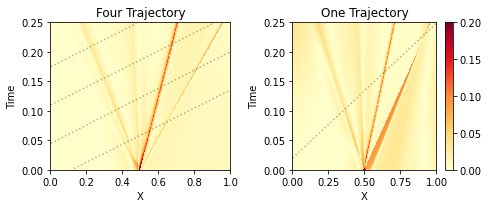

In [8]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

#This figure is a plot of the absolute error of density
# left: 4 traj
# right: 1 traj

ax.pcolormesh(space,time,error_scfour.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.2, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Four Trajectory")

img = ax2.pcolormesh(space,time,error_scone.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.2, shading='auto')
ax2.plot(sc_one[:,0], sc_one[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("One Trajectory")

fig.colorbar(img)
plt.tight_layout()
#fig.savefig("Sod_Error_compare.jpg", dpi=300)

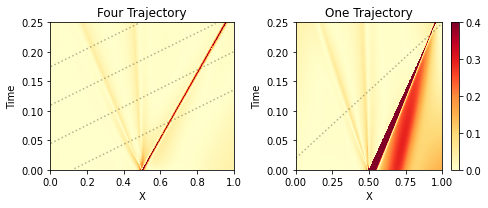

In [9]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

#This figure is a plot of the absolute error of velocity
# left: 4 traj
# right: 1 traj

ax.pcolormesh(space,time,error_scfour_v.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Four Trajectory")

img = ax2.pcolormesh(space,time,error_scone_v.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax2.plot(sc_one[:,0], sc_one[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("One Trajectory")

fig.colorbar(img)
plt.tight_layout()
#fig.savefig("Sod_Error_compare.jpg", dpi=300)

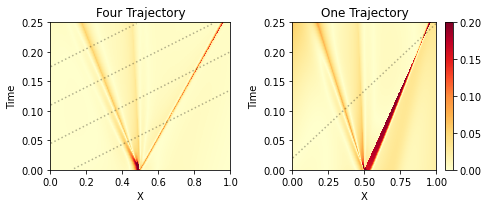

In [10]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

#This figure is a plot of the absolute error of pressure
# left: 4 traj
# right: 1 traj

ax.pcolormesh(space,time,error_scfour_p.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.2, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Four Trajectory")

img = ax2.pcolormesh(space,time,error_scone_p.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.2, shading='auto')
ax2.plot(sc_one[:,0], sc_one[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("One Trajectory")

fig.colorbar(img)
plt.tight_layout()
#fig.savefig("Sod_Error_compare.png", dpi=400)

In [11]:
error_scone_rel = np.abs((pred_density_one - st_data[0])/st_data[0])
error_scfour_rel = np.abs((pred_density_four - st_data[0])/st_data[0])

error_scone_v_rel = np.abs((pred_v_one - st_data[1])/pred_v_one)
error_scfour_v_rel = np.abs((pred_v_four - st_data[1])/pred_v_one)

error_scone_p_rel = np.abs((pred_p_one - st_data[2])/st_data[2])
error_scfour_p_rel = np.abs((pred_p_four - st_data[2])/st_data[2])

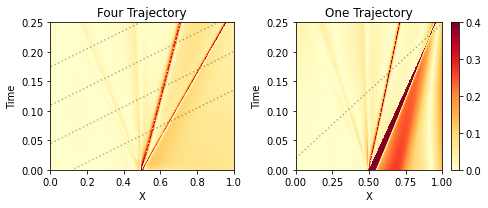

In [12]:
#This figure is a plot of the relative error of density
# left: 4 traj
# right: 1 traj

fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

ax.pcolormesh(space,time,error_scfour_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Four Trajectory")

img = ax2.pcolormesh(space,time,error_scone_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax2.plot(sc_one[:,0], sc_one[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("One Trajectory")

fig.colorbar(img)
plt.tight_layout()
fig.savefig("Sod_rel_error_compare.jpg", dpi=300)

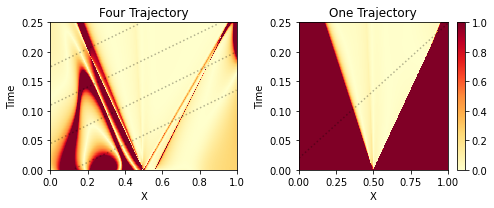

In [13]:
#relative error of velocity, looks messed up a bit since v = 0 leads to a relative error of infinity for any predicted non-zero value
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

ax.pcolormesh(space,time,error_scfour_v_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=1., shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Four Trajectory")

img = ax2.pcolormesh(space,time,error_scone_v_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=1., shading='auto')
ax2.plot(sc_one[:,0], sc_one[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("One Trajectory")

fig.colorbar(img)
plt.tight_layout()

In [14]:
error_scfour_v_rel.max()

196278.66666666666

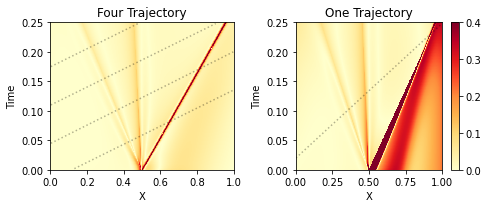

In [15]:
#relative error of pressure
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.set_size_inches(7,3)

ax.pcolormesh(space,time,error_scfour_p_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Four Trajectory")

img = ax2.pcolormesh(space,time,error_scone_p_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax2.plot(sc_one[:,0], sc_one[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("One Trajectory")

fig.colorbar(img)
plt.tight_layout()

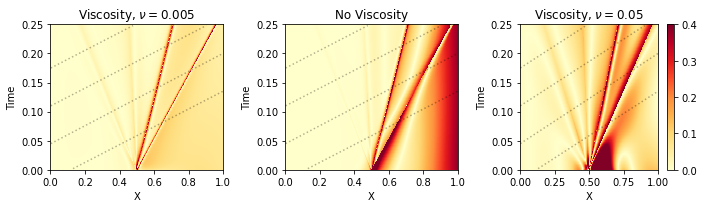

In [16]:
fig = plt.figure()
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
fig.set_size_inches(10,3)

#This figure is a plot of the relative error of density
# left: 4 traj, visc = 0.005
# middle: visc = 0
# right: visc = 0.05
error_v0_rel = np.abs((pred_density_v0_xt - st_data[0])/st_data[0])
error_v05_rel = np.abs((pred_density_v05_xt - st_data[0])/st_data[0])

ax.pcolormesh(space,time,error_scfour_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax.set_xlim(0.,1.)
ax.set_ylim(0.,0.25)
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title("Viscosity, $\\nu = 0.005$")

img = ax2.pcolormesh(space,time,error_v0_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax2.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax2.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax2.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax2.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax2.set_xlim(0.,1.)
ax2.set_ylim(0.,0.25)
ax2.set_xlabel("X")
ax2.set_ylabel("Time")
ax2.set_title("No Viscosity")

ax3.pcolormesh(space,time,error_v05_rel.T, cmap=plt.cm.YlOrRd,vmin=0., vmax=0.4, shading='auto')
ax3.plot(sc_1[:,0], sc_1[:,1],color='k', ls=':',alpha=0.3)
ax3.plot(sc_2[:,0], sc_2[:,1],color='k', ls=':',alpha=0.3)
ax3.plot(sc_3[:,0], sc_3[:,1],color='k', ls=':',alpha=0.3)
ax3.plot(sc_4[:,0], sc_4[:,1],color='k', ls=':',alpha=0.3)
ax3.set_xlim(0.,1.)
ax3.set_ylim(0.,0.25)
ax3.set_xlabel("X")
ax3.set_ylabel("Time")
ax3.set_title("Viscosity, $\\nu = 0.05$")

fig.colorbar(img)
plt.tight_layout()

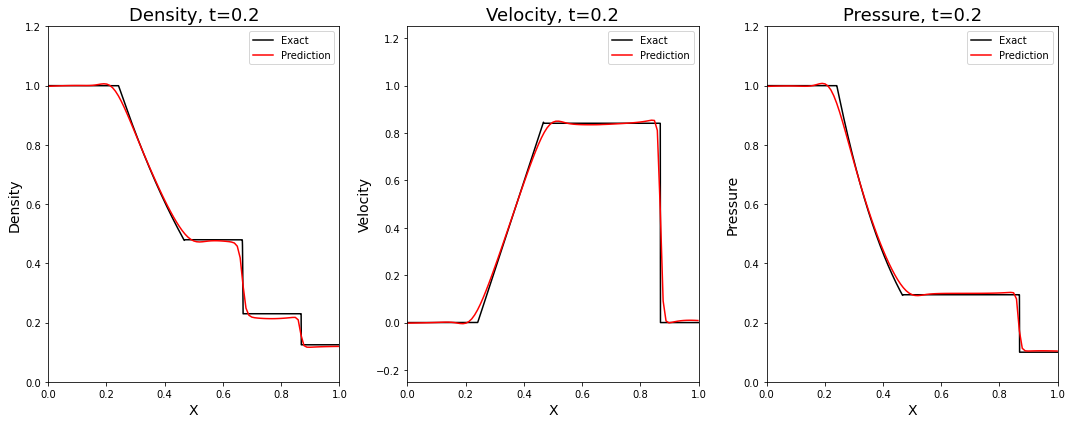

In [17]:
fig = plt.figure()
ax = fig.add_subplot(131)
ax.plot(space,st_data[0,:,200],color='k',label="Exact")
i = np.where(sptim_lin[::nt_samp,1] >= 0.2)[0][0]
ax.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*i:(i+1)*101,0],color='r', label='Prediction')
ax.legend(loc='best')
ax.set_xlim(0,1)
ax.set_ylim(0,1.2)
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Density", fontsize=14)
ax.set_title('Density, t=0.2', fontsize=18)
ax2 = fig.add_subplot(132)
ax2.plot(space,st_data[1,:,200],color='k',label="Exact")
ax2.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*i:(i+1)*101,1],color='r', label='Prediction')
ax2.legend(loc='best')
ax2.set_xlim(0,1)
ax2.set_ylim(-0.25,1.25)
ax2.set_xlabel("X",fontsize=14)
ax2.set_ylabel("Velocity", fontsize=14)
ax2.set_title('Velocity, t=0.2', fontsize=18)
ax3 = fig.add_subplot(133)
ax3.plot(space,st_data[2,:,200],color='k',label="Exact")
ax3.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*i:(i+1)*101,2],color='r', label='Prediction')
ax3.legend(loc='best')
ax3.set_xlim(0,1)
ax3.set_ylim(0.,1.2)
ax3.set_xlabel("X",fontsize=14)
ax3.set_ylabel("Pressure",fontsize=14)
ax3.set_title('Pressure, t=0.2', fontsize=18)

fig.set_size_inches(15,6)
plt.tight_layout()
#fig.savefig('SOD_NN_vs_Exact_density.png')

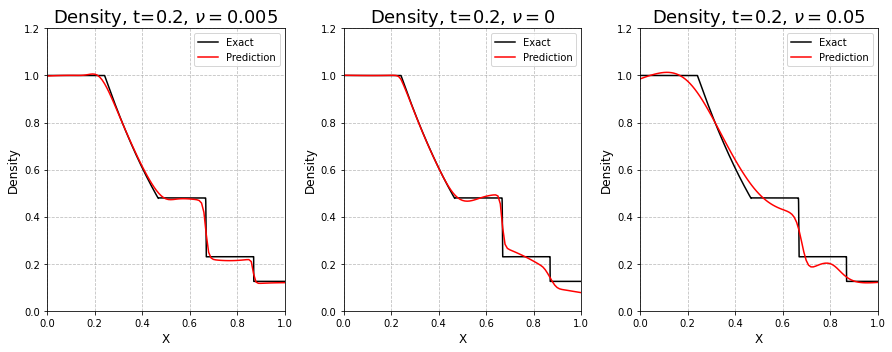

In [18]:
fig = plt.figure()
ax = fig.add_subplot(131)
ax.plot(space,st_data[0,:,200],color='k',label="Exact")
i = np.where(sptim_lin[::nt_samp,1] >= 0.2)[0][0]
ax.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*i:(i+1)*101,0],color='r', label='Prediction')
ax.legend(loc='best')
ax.set_xlim(0,1)
ax.set_ylim(0,1.2)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Density",fontsize=12)
ax.set_title('Density, t=0.2, $\\nu=0.005$',fontsize=18)
ax.grid(True,color='gray',ls='--',alpha=0.5)

ax2 = fig.add_subplot(132)
ax2.plot(space,st_data[0,:,200],color='k',label="Exact")
ax2.plot(sptim_lin[:nx_samp,0], pred_sod_v0[101*i:(i+1)*101,0],color='r', label='Prediction')
ax2.legend(loc='best')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1.2)
ax2.set_xlabel("X",fontsize=12)
ax2.set_ylabel("Density",fontsize=12)
ax2.set_title('Density, t=0.2, $\\nu=0$',fontsize=18)
ax2.grid(True,color='gray',ls='--',alpha=0.5)

ax3 = fig.add_subplot(133)
ax3.plot(space,st_data[0,:,200],color='k',label="Exact")
ax3.plot(sptim_lin[:nx_samp,0], pred_sod_v05[101*i:(i+1)*101,0],color='r', label='Prediction')
ax3.legend(loc='best')
ax3.set_xlim(0,1)
ax3.set_ylim(0,1.2)
ax3.set_xlabel("X",fontsize=12)
ax3.set_ylabel("Density",fontsize=12)
ax3.set_title('Density, t=0.2, $\\nu=0.05$',fontsize=18)
ax3.grid(True,color='gray',ls='--',alpha=0.5)

fig.set_size_inches(12.5,5)
plt.tight_layout()

fig.savefig("Sod_Viscosity_sm.jpg",dpi=300)

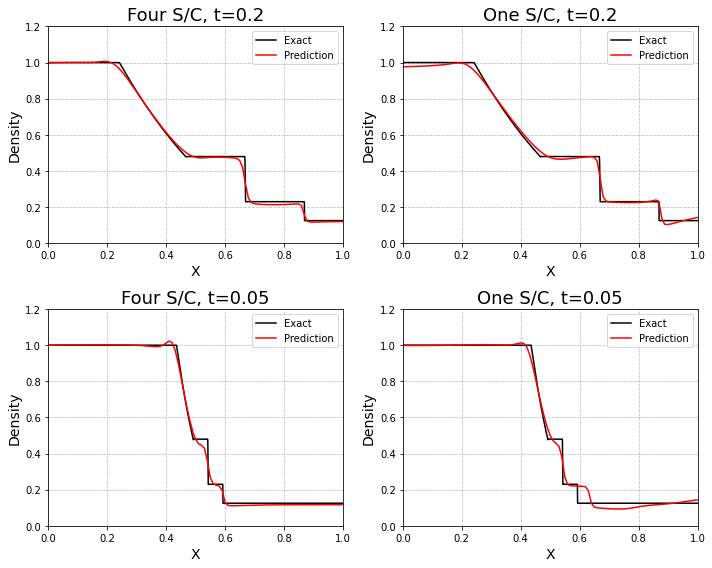

In [19]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(space,st_data[0,:,200],color='k',label="Exact")
i = np.where(sptim_lin[::nt_samp,1] >= 0.2)[0][0]
ax.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*i:(i+1)*101,0],color='r', label='Prediction')
ax.legend(loc='best')
ax.set_xlim(0,1)
ax.set_ylim(0,1.2)
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_title('Four S/C, t=0.2',fontsize=18)
ax.grid(True,color='gray',ls='--',alpha=0.5)

ax2 = fig.add_subplot(222)
ax2.plot(space,st_data[0,:,200],color='k',label="Exact")
ax2.plot(sptim_lin[:nx_samp,0], pred_sod_lin_one[101*i:(i+1)*101,0],color='r', label='Prediction')
ax2.legend(loc='best')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1.2)
ax2.set_xlabel("X",fontsize=14)
ax2.set_ylabel("Density",fontsize=14)
ax2.set_title('One S/C, t=0.2',fontsize=18)
ax2.grid(True,color='gray',ls='--',alpha=0.5)

ax3 = fig.add_subplot(223)
j = np.where(sptim_lin[::nt_samp,1] >= 0.05)[0][0]
ax3.plot(space,st_data[0,:,50],color='k',label="Exact")
ax3.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*j:(j+1)*101,0],color='r', label='Prediction')
ax3.legend(loc='best')
ax3.set_xlim(0,1)
ax3.set_ylim(0.,1.2)
ax3.set_xlabel("X",fontsize=14)
ax3.set_ylabel("Density",fontsize=14)
ax3.set_title('Four S/C, t=0.05',fontsize=18)
ax3.grid(True,color='gray',ls='--',alpha=0.5)

ax4 = fig.add_subplot(224)
ax4.plot(space,st_data[0,:,50],color='k',label="Exact")
ax4.plot(sptim_lin[:nx_samp,0], pred_sod_lin_one[101*j:(j+1)*101,0],color='r', label='Prediction')
ax4.legend(loc='best')
ax4.set_xlim(0,1)
ax4.set_ylim(0.,1.2)
ax4.set_xlabel("X",fontsize=14)
ax4.set_ylabel("Density",fontsize=14)
ax4.set_title('One S/C, t=0.05',fontsize=18)
ax4.grid(True,color='gray',ls='--',alpha=0.5)

fig.set_size_inches(10,8)
plt.tight_layout()
fig.savefig('Sc_time_comparesm.jpg',dpi=300)

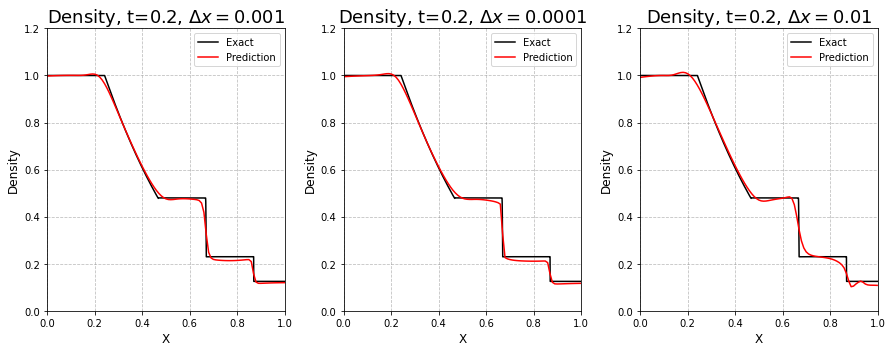

In [20]:
# for dx differences

fig = plt.figure()
ax = fig.add_subplot(131)
ax.plot(space,st_data[0,:,200],color='k',label="Exact")
i = np.where(sptim_lin[::nt_samp,1] >= 0.2)[0][0]
ax.plot(sptim_lin[:nx_samp,0], pred_sod_lin[101*i:(i+1)*101,0],color='r', label='Prediction')
ax.legend(loc='best')
ax.set_xlim(0,1)
ax.set_ylim(0,1.2)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Density",fontsize=12)
ax.set_title('Density, t=0.2, $\\Delta x = 0.001$',fontsize=18)
ax.grid(True,color='gray',ls='--',alpha=0.5)

ax2 = fig.add_subplot(132)
ax2.plot(space,st_data[0,:,200],color='k',label="Exact")
ax2.plot(sptim_lin[:nx_samp,0], pred_sod_dx0001[101*i:(i+1)*101,0],color='r', label='Prediction')
ax2.legend(loc='best')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1.2)
ax2.set_xlabel("X",fontsize=12)
ax2.set_ylabel("Density",fontsize=12)
ax2.set_title('Density, t=0.2, $\\Delta x = 0.0001$',fontsize=18)
ax2.grid(True,color='gray',ls='--',alpha=0.5)

ax3 = fig.add_subplot(133)
ax3.plot(space,st_data[0,:,200],color='k',label="Exact")
ax3.plot(sptim_lin[:nx_samp,0], pred_sod_dx01[101*i:(i+1)*101,0],color='r', label='Prediction')
ax3.legend(loc='best')
ax3.set_xlim(0,1)
ax3.set_ylim(0,1.2)
ax3.set_xlabel("X",fontsize=12)
ax3.set_ylabel("Density",fontsize=12)
ax3.set_title('Density, t=0.2, $\\Delta x=0.01$',fontsize=18)
ax3.grid(True,color='gray',ls='--',alpha=0.5)

fig.set_size_inches(12.5,5)
plt.tight_layout()

fig.savefig("Sod_dxcompare_sm.jpg",dpi=300)

In [21]:
#for 8192x400
#%timeit test = model_sod_full(xxtt)

#for 8192x1 (at one time)
#xsp,tsp = np.meshgrid(space,0.2,indexing='ij')
#xt_t02 = np.stack((xsp.flatten(),tsp.flatten())).T
#%timeit model_sod_full(xt_t02)

In [22]:
sp_min = 0
sp_max = 1
t_min = 0
t_max = 0.248

Text(0.5, 1.0, 'Exact density w/ trajectories')

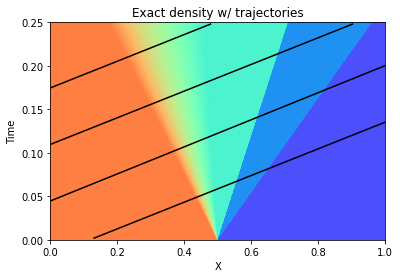

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(space,time,st_data[0].T, cmap=plt.cm.rainbow,vmin=0.,vmax=1.2, shading='auto')
ax.set_xlim(sp_min, sp_max)
ax.set_ylim(t_min, 0.25)
ax.plot(sc_1[:,0],sc_1[:,1],color='k')
ax.plot(sc_2[:,0],sc_2[:,1],color='k')
ax.plot(sc_3[:,0],sc_3[:,1],color='k')
ax.plot(sc_4[:,0],sc_4[:,1],color='k')
ax.set_xlabel("X")
ax.set_ylabel("Time")
ax.set_title('Exact density w/ trajectories')
#fig.savefig(path+'/density_ST_craft.png')

Text(0, 0.5, 'Time')

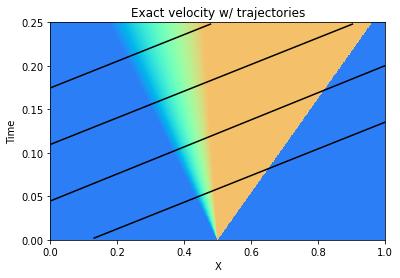

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(space,time,st_data[1].T, cmap=plt.cm.rainbow,vmin=-0.25,vmax=1.25, shading='auto')
ax.set_xlim(sp_min, sp_max)
ax.set_ylim(t_min, 0.25)
ax.plot(sc_1[:,0],sc_1[:,1],color='k')
ax.plot(sc_2[:,0],sc_2[:,1],color='k')
ax.plot(sc_3[:,0],sc_3[:,1],color='k')
ax.plot(sc_4[:,0],sc_4[:,1],color='k')
ax.set_title('Exact velocity w/ trajectories')
ax.set_xlabel("X")
ax.set_ylabel("Time")

Text(0, 0.5, 'Time')

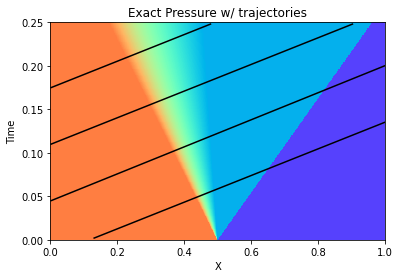

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(space,time,st_data[2].T, cmap=plt.cm.rainbow,vmin=0.,vmax=1.2, shading='auto')
ax.set_xlim(sp_min, sp_max)
ax.set_ylim(t_min, 0.25)
ax.plot(sc_1[:,0],sc_1[:,1],color='k')
ax.plot(sc_2[:,0],sc_2[:,1],color='k')
ax.plot(sc_3[:,0],sc_3[:,1],color='k')
ax.plot(sc_4[:,0],sc_4[:,1],color='k')
ax.set_title('Exact Pressure w/ trajectories')
ax.set_xlabel("X")
ax.set_ylabel("Time")

In [26]:
pred_sod = model_sod_full(sptim_lin).numpy()
pred_density = pred_sod[:,0].reshape(nx_samp,nt_samp)
pred_v = pred_sod[:,1].reshape(nx_samp,nt_samp)
pred_p = pred_sod[:,2].reshape(nx_samp,nt_samp)

Text(0, 0.5, 'Time')

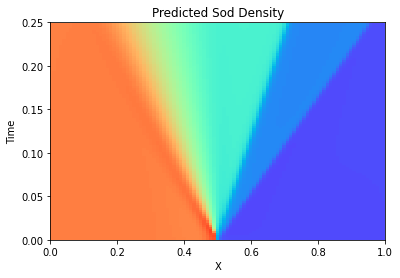

In [27]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.pcolormesh(sptim_lin[:nx_samp,0], sptim_lin[::nt_samp,1], pred_density, vmin=0., vmax=1.2, cmap=plt.cm.rainbow, shading='auto')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.25)
ax2.set_title('Predicted Sod Density')
ax2.set_xlabel("X")
ax2.set_ylabel("Time")

Text(0, 0.5, 'Time')

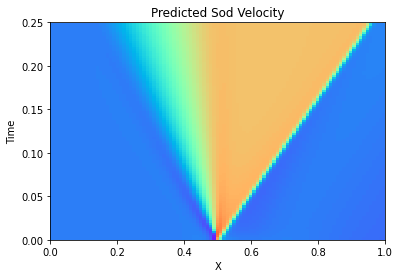

In [28]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.pcolormesh(sptim_lin[:nx_samp,0], sptim_lin[::nt_samp,1], pred_v, vmin=-0.25, vmax=1.25, cmap=plt.cm.rainbow, shading='auto')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.25)
ax2.set_title('Predicted Sod Velocity')
ax2.set_xlabel("X")
ax2.set_ylabel("Time")

Text(0, 0.5, 'Time')

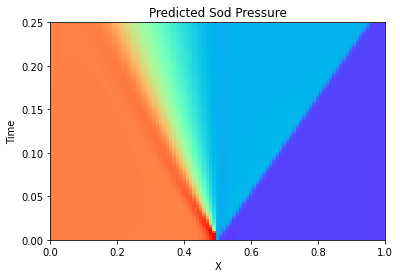

In [29]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.pcolormesh(sptim_lin[:nx_samp,0], sptim_lin[::nt_samp,1], pred_p, vmin=0.,vmax=1.2, cmap=plt.cm.rainbow, shading='auto')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 0.25)
ax2.set_title('Predicted Sod Pressure')
ax2.set_xlabel("X")
ax2.set_ylabel("Time")